<a href="https://colab.research.google.com/github/cnrhkdgus95gmailcom/SHI-DT-Campus/blob/main/6_7_%EC%A0%80%EB%85%81_'titanic_csv'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://wikidocs.net/42596 ; 토닥토닥 파이썬 - 머신러닝

https://wikidocs.net/75068 ; Kaggle에서 파이썬으로 데이터 분석 시작하기

문제) pclass, sex, age, sibsp, parch, fare, embarked 가 각각 2, 'Female', 21, 0, 1, 21.00, 'S' 인 타이타닉 승객의 생존 여부를 예측하세요.

model = LogisticRegression()

# titanic.csv

예)

1. 데이터 가져오기

    df = pd.read_csv( )

2. 데이터 전처리 ; data, target

    data = df[ [ ] ].to_numpy()

    target = df[ [ ] ].to_numpy()

3. 데이터 분할 ; train_test_split(data, target)

4. 데이터 표준화

    mean = np.mean(train_input, axis = 0)

    std = np.std(train_input, axis = 0)

    train_scaled = (train_input - mean) /std

    test_scaled = (test_input - mean) / std

5. 학습

    model = KNeighborsClassifier()

    model.fit(train_scaled, train_target)

6. 평가
    
    model.score(test_scaled,test_target)


In [227]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# scikit-learn
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors algorithm ; supervised learning method 
from sklearn.model_selection import train_test_split # split
from sklearn.preprocessing import StandardScaler # Standardize features

import seaborn as sns
df = pd.read_csv('titanic.csv')

del df["Unnamed: 0"]
del df['alive']
del df['age']
del df['deck']

box = []
for i in df['sex']:
    if i == 'male':
        box.append(1000) # True, False도 1,0처럼 위험함...
    elif i =='female':
        box.append(500)
    else:
        box.append(0)
df['sex'] = box

target = df[['survived']].to_numpy()
data = df[['pclass','sex','sibsp','parch','fare']].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) /std
test_scaled = (test_input - mean) / std

model = KNeighborsClassifier()
model.fit(train_scaled, train_target) 
model.score(test_scaled,test_target)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8071748878923767

In [223]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# scikit-learn
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors algorithm ; supervised learning method 
from sklearn.model_selection import train_test_split # split
from sklearn.preprocessing import StandardScaler # Standardize features

import seaborn as sns

In [228]:
df = pd.read_csv('titanic.csv')
del df["Unnamed: 0"]
df.isnull().sum(axis=0) # 데이터 프레임의 null 값의 개수를 세어 줌 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [232]:
df = pd.read_csv('titanic.csv')
del df["Unnamed: 0"]
del df['alive']
del df['age']
del df['deck']
df

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,True


In [233]:
df.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [234]:
box = []
for i in df['sex']:
    if i == 'male':
        box.append(1000) # 이것도 1,0처럼 위험함...
    elif i =='female':
        box.append(500)
    else:
        box.append(0)
df['sex'] = box
df

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1000,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,500,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,500,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,500,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,1000,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1000,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,500,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,500,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,1000,0,0,30.0000,C,First,man,True,Cherbourg,True


In [235]:
df.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [236]:
# train = train.dropna(axis=0)
# train = train.reset_index(drop=True)

In [237]:
data = df[['pclass','sex','sibsp','parch','fare']].to_numpy()
target = df[['survived']].to_numpy()

In [239]:
train_input, test_input, train_target, test_target = train_test_split(data, target)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) /std
test_scaled = (test_input - mean) / std

model = KNeighborsClassifier()
model.fit(train_scaled, train_target) 
model.score(test_scaled,test_target)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8116591928251121

# cf)pie_chart

생존 여부(Survived)와 각 칼럼 간의 관계를 파이 차트로 분석하기 위해 공통 함수를 아래와 같이 구현하였습니다.

show_pie_chart
survived_crosstab, pie_chart 함수를 이용하여 파이차트 생성

survived_crosstab
col_name과 Survived 간의 교차 도표 생성
생존 여부를 보기 편하게 문자로 변환

pie_chart
파이 차트 생성

In [244]:
def show_pie_chart(dfr, col_name):
    colname_survived = survived_crosstab(df, col_name)
    pie_chart(colname_survived)
    return colname_survived
def survived_crosstab(dfr, col_name):
    '''col_name과 Survived간의 교차도표 생성'''
    feature_survived = pd.crosstab(df[col_name], df['survived'])
    feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
    return feature_survived
def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' survived".format(index_name))

    plt.show()

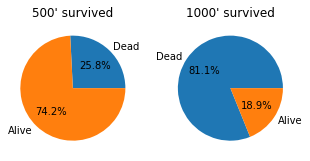

survived,Dead,Alive
sex,,
500,81,233
1000,468,109


In [245]:
c = show_pie_chart(df, 'sex')
c